<a href="https://colab.research.google.com/github/MoonlightO2/UK-Weather-Engineering-Analysis-/blob/main/UK_Sunrise_%26_Sunset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [5]:
data_path = '/content/drive/MyDrive/2. Projects/Colab Notebooks/Portfolio/Daily task - Web Scraping News - Data Analysis/World Weather Data Collection/UK - Sunrise & Sunset.csv'

In [6]:
data = pd.read_csv(data_path)
print('Shape: ', data.shape, '\n')
print('Columns: ', data.columns.tolist(), '\n')
data.head()

Shape:  (1827, 5) 

Columns:  ['Date', 'Day', 'Sunrise', 'Sunset', 'Day Length'] 



,Date,Day,Sunrise,Sunset,Day Length
0,"Jan 1, 2020",Wed,8:07 AM,4:02 PM,07h 54m
1,"Jan 2, 2020",Thu,8:07 AM,4:03 PM,07h 55m
2,"Jan 3, 2020",Fri,8:07 AM,4:04 PM,07h 57m
3,"Jan 4, 2020",Sat,8:06 AM,4:05 PM,07h 58m
4,"Jan 5, 2020",Sun,8:06 AM,4:06 PM,07h 59m


In [7]:
from datetime import datetime

# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%b %d, %Y')

# Convert 'Day Length' to minutes
data['Day Length in Mins'] = data['Day Length'].apply(lambda x: int(x.split('h')[0]) * 60 + int(x.split(' ')[1][0:-1]))
data.head()

,Date,Day,Sunrise,Sunset,Day Length,Day Length in Mins
0,2020-01-01,Wed,8:07 AM,4:02 PM,07h 54m,474
1,2020-01-02,Thu,8:07 AM,4:03 PM,07h 55m,475
2,2020-01-03,Fri,8:07 AM,4:04 PM,07h 57m,477
3,2020-01-04,Sat,8:06 AM,4:05 PM,07h 58m,478
4,2020-01-05,Sun,8:06 AM,4:06 PM,07h 59m,479


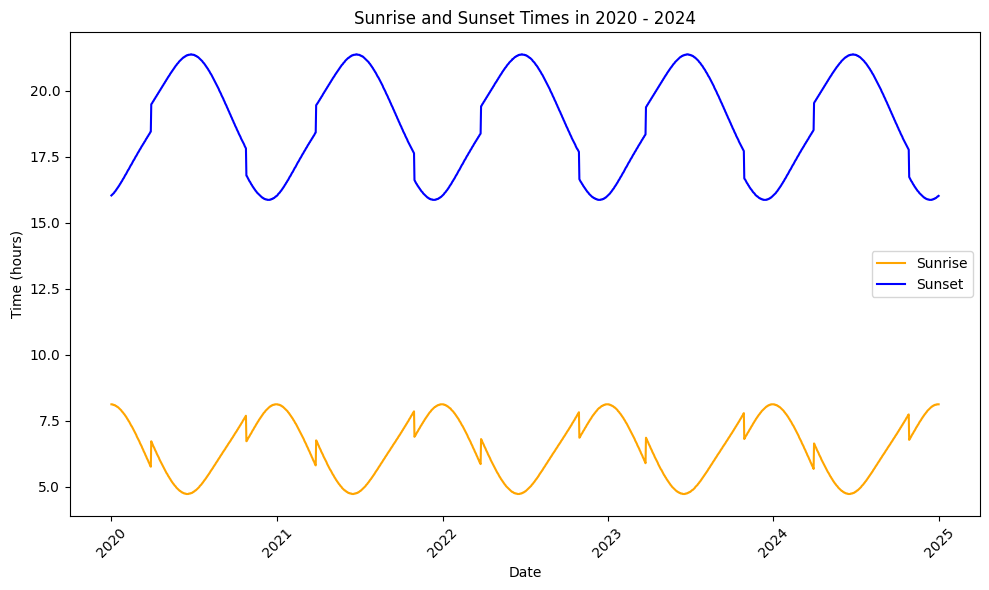

In [10]:
dates = data['Date']
sunrise_times = data['Sunrise']
sunset_times = data['Sunset']

# Convert time strings to datetime objects
sunrise_times = [datetime.strptime(time, "%I:%M %p").time() for time in sunrise_times]
sunset_times = [datetime.strptime(time, "%I:%M %p").time() for time in sunset_times]

# Extract hours and minutes from datetime.time objects
sunrise_hours = [time.hour + time.minute / 60 for time in sunrise_times]
sunset_hours = [time.hour + time.minute / 60 for time in sunset_times]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(dates, sunrise_hours, linestyle='-', color='orange', label='Sunrise')
plt.plot(dates, sunset_hours, linestyle='-', color='blue', label='Sunset')

# Beautify the x-labels
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Time (hours)')

# Show legend
plt.legend()

# Show the plot
plt.title('Sunrise and Sunset Times in 2020 - 2024')
plt.tight_layout()
plt.show()

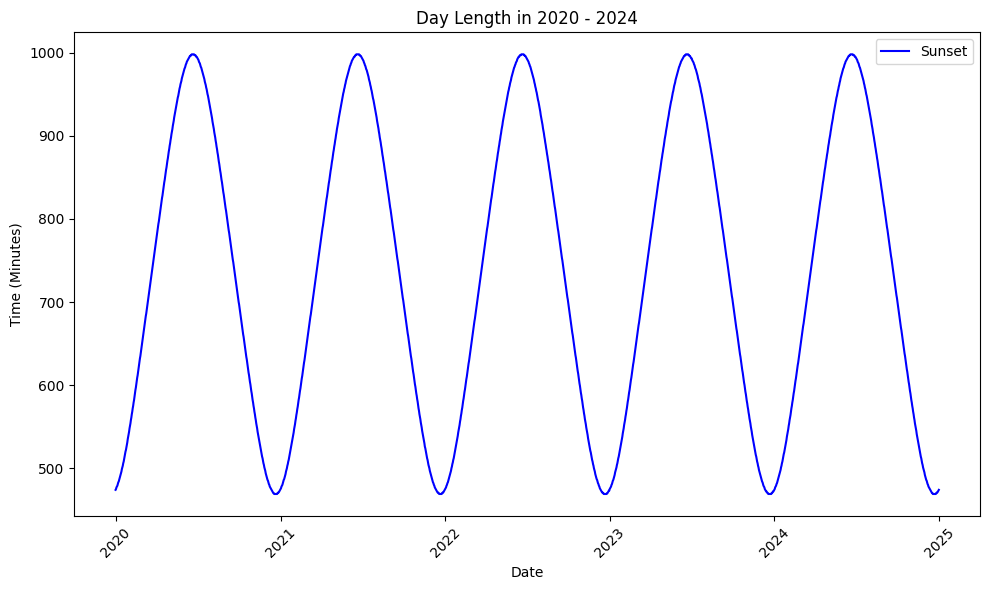

In [11]:
dates = data['Date']
day_length = data['Day Length in Mins']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(dates, day_length, linestyle='-', color='blue', label='Sunset')

# Beautify the x-labels
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Time (Minutes)')

# Show legend
plt.legend()

# Show the plot
plt.title('Day Length in 2020 - 2024')
plt.tight_layout()
plt.show()